In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Input movies dataset
movies = pd.read_csv(r"/content/movies.dat", sep='::', engine='python', encoding='latin1')
movies.columns =['MovieID', 'Title', 'Genres']
movies.dropna(inplace=True)
movies.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
#Input ratings dataset
ratings = pd.read_csv(r"/content/ratings.dat",sep='::', engine='python')
ratings.columns =['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings.dropna(inplace=True)

#Read the sample ratings dataset
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,661,3,978302109.0
1,1,914,3,978301968.0
2,1,3408,4,978300275.0
3,1,2355,5,978824291.0
4,1,1197,3,978302268.0


In [4]:
#Input users dataset
users = pd.read_csv(r"/content/users.dat",sep='::',engine='python')
users.columns =['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users.dropna(inplace=True)

#Read the sample users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [5]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1357,Shine (1996),2,56,M,16,5
1,3068,"Verdict, The (1982)",2,56,M,16,4
2,1537,Shall We Dance? (Shall We Dansu?) (1996),2,56,M,16,4
3,647,Courage Under Fire (1996),2,56,M,16,3
4,2194,"Untouchables, The (1987)",2,56,M,16,4


In [6]:
# all 5 rating movies list and Age Lass Then 25 count = 47163
master_data[(master_data['Rating'] == 5) & (master_data['Age'] < 25 ) ]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
1883,2987,Who Framed Roger Rabbit? (1988),18,18,F,3,5
1884,2989,For Your Eyes Only (1981),18,18,F,3,5
1885,2622,"Midsummer Night's Dream, A (1999)",18,18,F,3,5
1889,1683,"Wings of the Dove, The (1997)",18,18,F,3,5
1893,3793,X-Men (2000),18,18,F,3,5
...,...,...,...,...,...,...,...
808905,3671,Blazing Saddles (1974),4864,18,M,20,5
808908,1394,Raising Arizona (1987),4864,18,M,20,5
808910,110,Braveheart (1995),4864,18,M,20,5
808915,2791,Airplane! (1980),4864,18,M,20,5


In [7]:
# all 5 rating movies list and Age Lass Then 25 count = 47163
master_data[(master_data['Rating'] < 3) & (master_data['Age'] < 25 )]

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
1898,1186,"Sex, Lies, and Videotape (1989)",18,18,F,3,1
1902,3438,Teenage Mutant Ninja Turtles (1990),18,18,F,3,2
1905,3439,Teenage Mutant Ninja Turtles II: The Secret of...,18,18,F,3,1
1907,1690,Alien: Resurrection (1997),18,18,F,3,1
1909,2,Jumanji (1995),18,18,F,3,2
...,...,...,...,...,...,...,...
805388,517,Rising Sun (1993),4830,1,M,10,2
807378,2858,American Beauty (1999),4849,18,F,4,2
807425,2966,"Straight Story, The (1999)",4849,18,F,4,2
808516,509,"Piano, The (1993)",4859,18,F,14,1


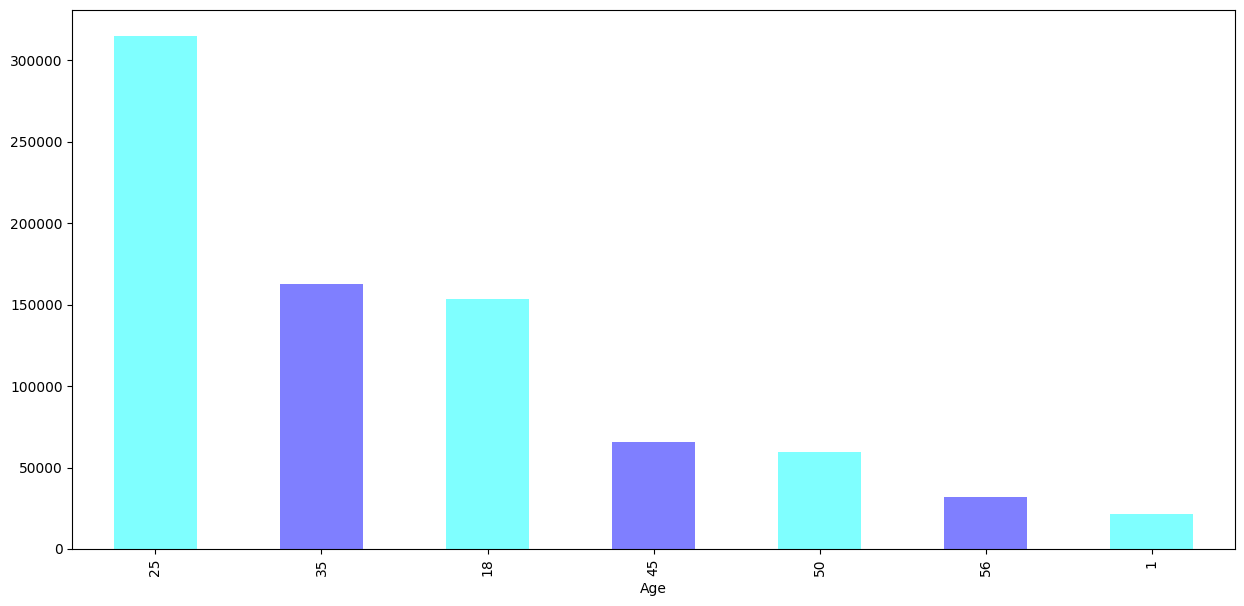

In [8]:
#Data Visualization
master_data['Age'].value_counts().plot(kind='bar', color= ['cyan', 'blue'],alpha=0.5,figsize=(15,7))
plt.show()

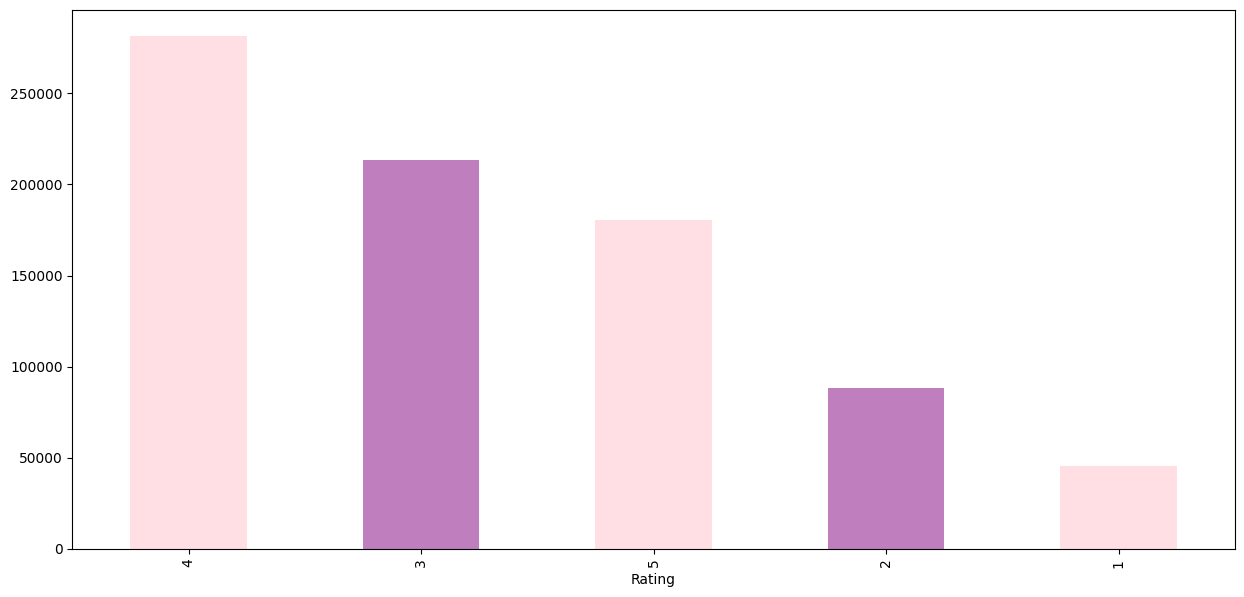

In [9]:
master_data['Rating'].value_counts().plot(kind='bar', color=['pink', 'purple'],alpha=0.5,figsize=(15,7))
plt.show()

Age
18    28
25    52
35    27
45    11
50     3
56     7
Name: MovieID, dtype: int64

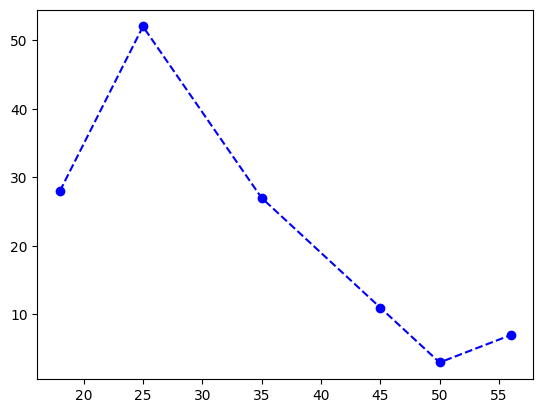

In [10]:
res = master_data[master_data.Title == "Only You (1994)"]

plt.plot(res.groupby("Age")["MovieID"].count(),'--bo')
res.groupby("Age")["MovieID"].count()

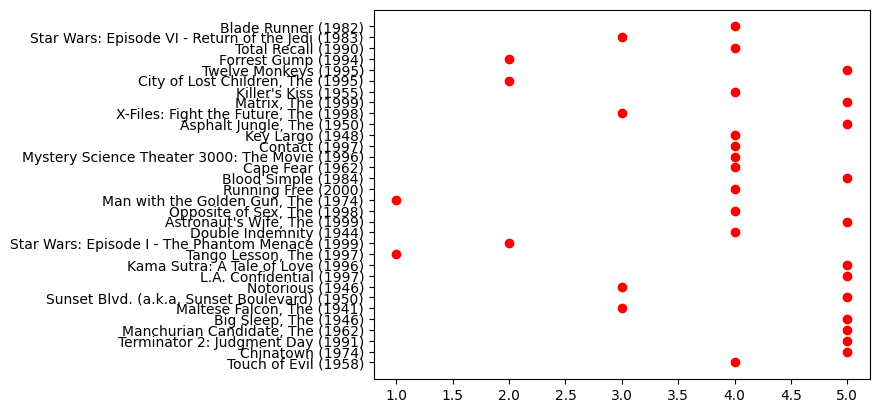

In [12]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 700

res = master_data[master_data.UserID == 700]

plt.scatter(y=res.Title, x=res.Rating , color = 'red')
plt.show()

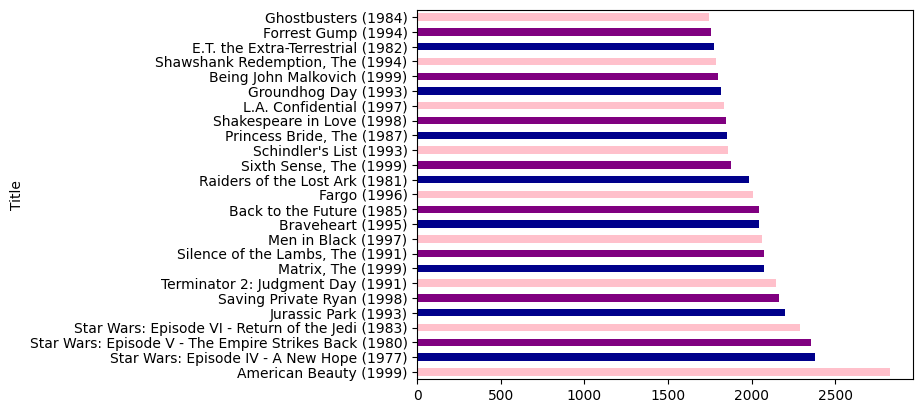

In [15]:
res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh", color = ['pink', 'darkblue', 'purple'])
plt.show()

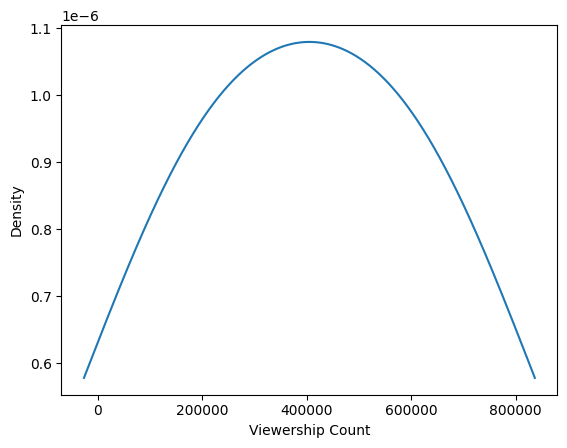

In [16]:
res = master_data.groupby("Gender").size().sort_values(ascending=False)[:25]
plt.ylabel("Gender")
plt.xlabel("Viewership Count")
res.plot(kind="kde")
plt.show()

<Axes: xlabel='Rating', ylabel='Rating'>

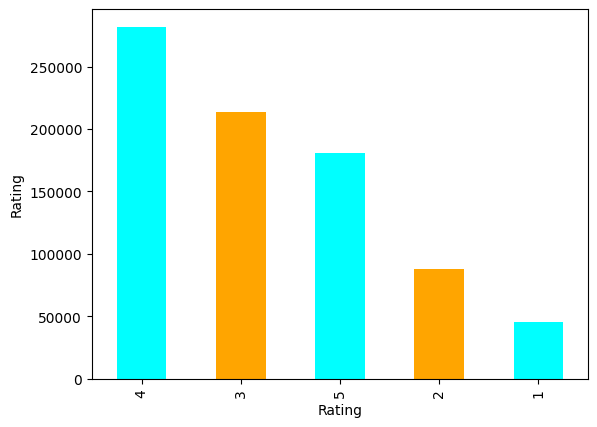

In [21]:
res = master_data.groupby("Rating").size().sort_values(ascending=False)[:25]
plt.ylabel("Rating")
plt.xlabel("Viewership Count")
res.plot(kind='bar', color= ['cyan', 'orange'])

In [22]:
#machin learning
#First 500 extracted records
first_500 = master_data[500:]
first_500.dropna(inplace=True)

In [23]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

#Use rating as label
labels = first_500[['Rating']].values

In [24]:
#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

In [25]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

34.78

In [27]:
gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

34.8

In [28]:
perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

22.29

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

58.32